<center><font size = "10"> Week 3 - Morphologies <center>
<center><font size = "8">Homework<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 8
<br>Group member1: Chiara Maria Matti
<br>Group member2: Elena Grazia Gado
<br>Group member3: ELiser Josan Romero
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

In [2]:
%matplotlib inline 

import numpy as np
import neurom as nm
import matplotlib.pyplot as plt

from neuron import h
from hoc2swc import neuron2swc
from neurom import view
from neurom.view.matplotlib_utils import update_plot_limits

--No graphics will be displayed.


# <font color='red'> Ex1: </font>Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

<font color= 'red'>[0.5 pts]

In [3]:
# your answer
soma = h.Section(name="soma")
dend_1 = h.Section(name="dendrite_1")
dend_2 = h.Section(name="dendrite_2")
axon = h.Section(name="axon")

# geometry
soma.L = soma.diam = 15
dend_1.L = 100
dend_1.diam = 4
dend_2.L = 120
dend_2.diam = 4
axon.L = 300
axon.diam = 7

# topology
axon.connect(soma(0))
dend_1.connect(soma(1))
dend_2.connect(soma(1))
nbranches = 3
branches = []
for i in range(nbranches):
    branch = h.Section(name=f"branch {i}")
    branch.L - 20
    branch.diam = 3
    branch.connect(dend_2(1))
    branches.append(branch) 

h.topology()  


|-|       soma(0-1)
   `|       dendrite_1(0-1)
   `|       dendrite_2(0-1)
     `|       branch 0(0-1)
     `|       branch 1(0-1)
     `|       branch 2(0-1)
 `|       axon(0-1)



1.0

Wrote cell 0 to output/cell_ex1.swc


output/cell_ex1.swc:7:warning

output/cell_ex1.swc:19:warning



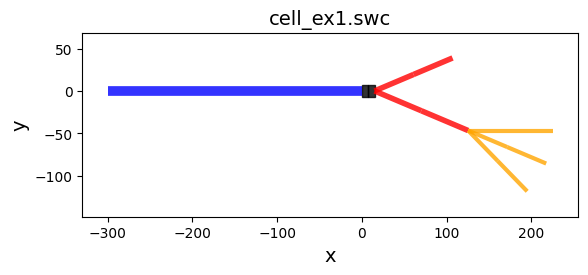

In [4]:
# your plot
neuron2swc("output/cell_ex1.swc", swap_yz=False)
neuron1 = nm.load_morphology("output/cell_ex1.swc")
view.plot_morph(neuron1)

# <font color= 'red'>Ex2:</font> Visualizing neurons


Get familiar with your assigned morphology
    
    
<font size ="3"> Generate three plots:
  - Visualize each of your group's cells with neurom
  - Pick a cell and create a dendrogram of it
  - Pick a cell, isolate each of its neurites, and view them individually
    
Make sure to include a title for each plot, and for 1 and 2 plot everything within the same figure (hint: use `plt.subplots`). The plots should be clear - not cluttered <font color= 'red'>[1.5 pts]

~ Hint: if you run into problems, check out neurom.view.matplotlib_utils

In [5]:
morph_dir = 'input/group_08'
neurons = nm.load_morphologies(morph_dir)

#### <font color= 'red'>keep or remove axes? WARNING?</font>


input/group_08/morph_2.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 46.74 55.59 -8.25 8.811 -1
2 1 46.740002 64.400002 (exp. 46.778999) -8.250000 8.811000 1
3 1 46.740002 46.779999 (exp. 64.401001) -8.250000 8.811000 1


input/group_08/morph_9.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 15.24 -48.6 0 15.7567 -1
2 1 15.240000 -32.840000 (exp. -64.356697) 0.000000 15.756700 1
3 1 15.240000 -64.360001 (exp. -32.843300) 0.000000 15.756700 1


input/group_08/morph_8.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 -7.57 8.82 9.48 7.563 -1
2 1 -7.570000 16.389999 (exp. 1.256999) 9.480000 7.563000 1
3 1 -7.570000 1.260000 (exp. 16.382999) 9.480000 7.563000 1


input/group_08/morph_5.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+

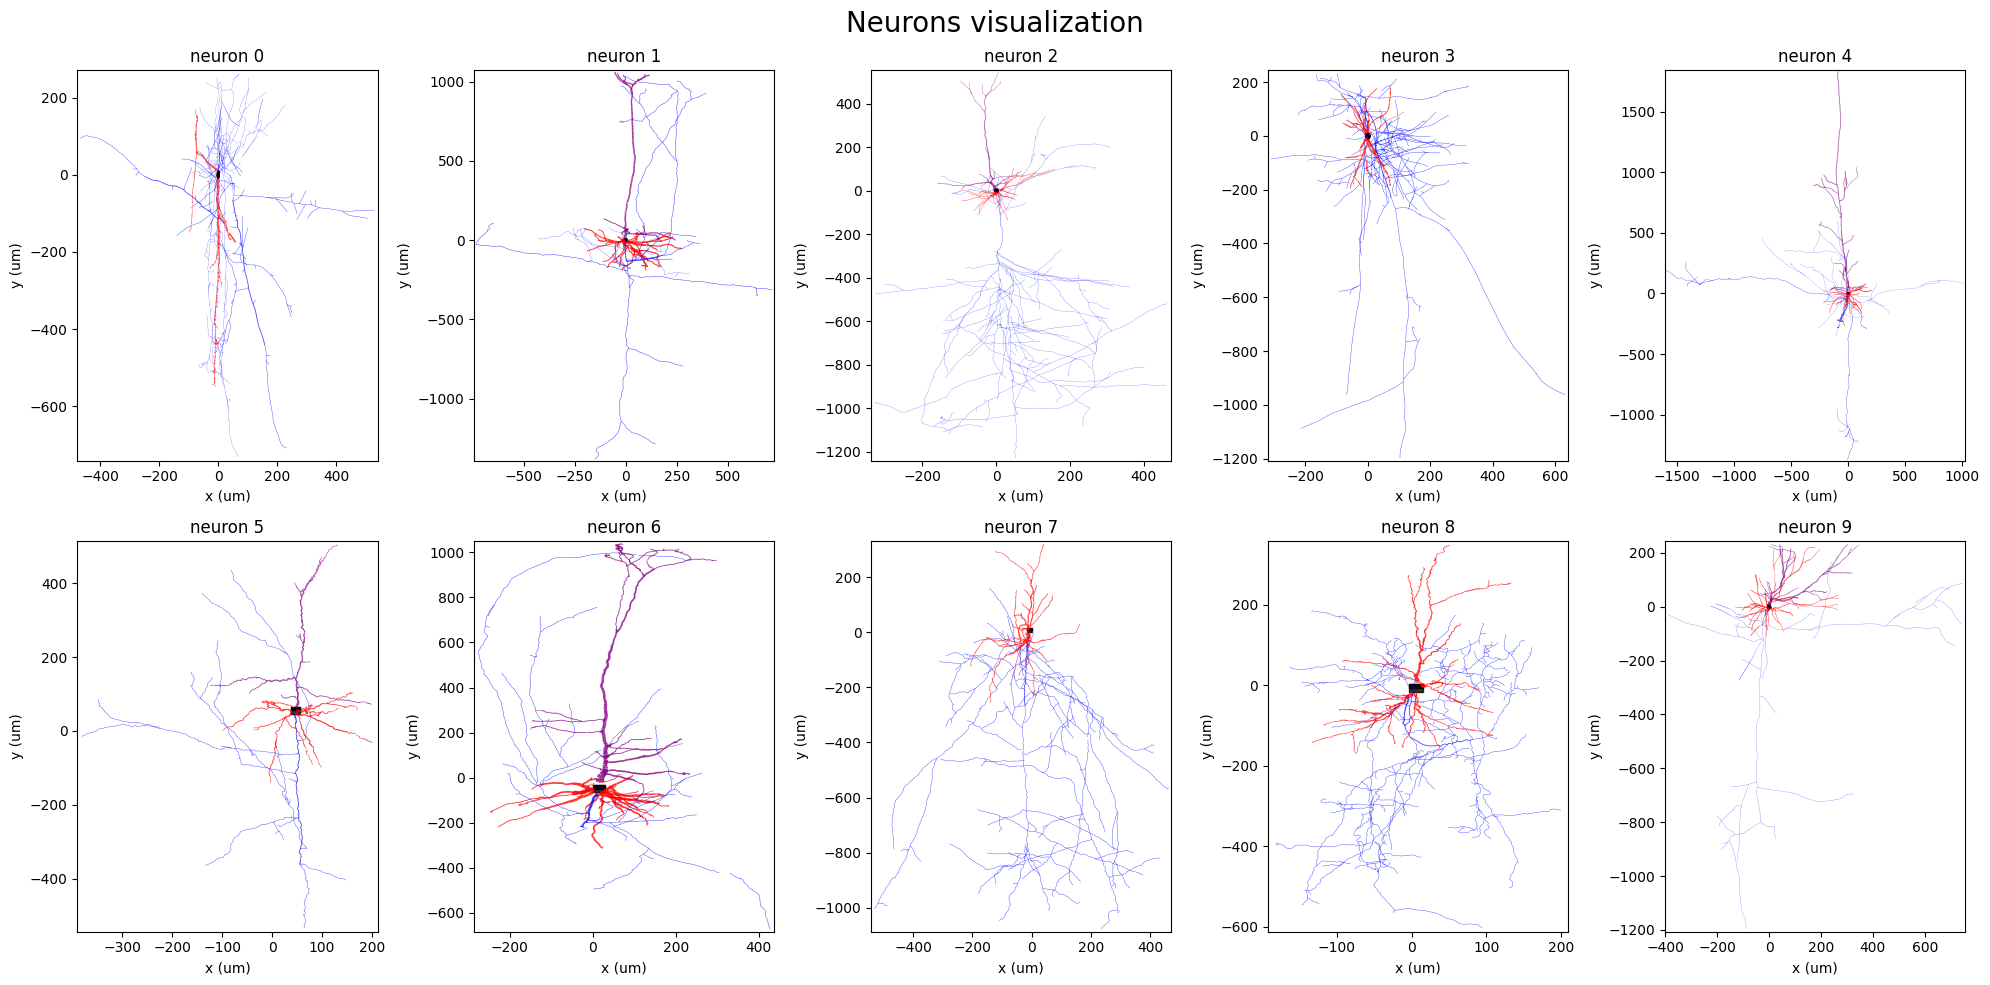

In [6]:
# your plots of all neurons in your group
N = len(neurons)

# create N subplots, one for each neuron
fig, axes = plt.subplots(2, N//2, figsize=(20, 10)) 

for i, n in enumerate(neurons):
    current_axes = axes[i//(N//2)][i%(N//2)]

    view.plot_morph(n, ax=current_axes)
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neuron {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle('Neurons visualization', fontsize=20);
plt.tight_layout()


input/group_08/morph_2.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 46.74 55.59 -8.25 8.811 -1
2 1 46.740002 64.400002 (exp. 46.778999) -8.250000 8.811000 1
3 1 46.740002 46.779999 (exp. 64.401001) -8.250000 8.811000 1



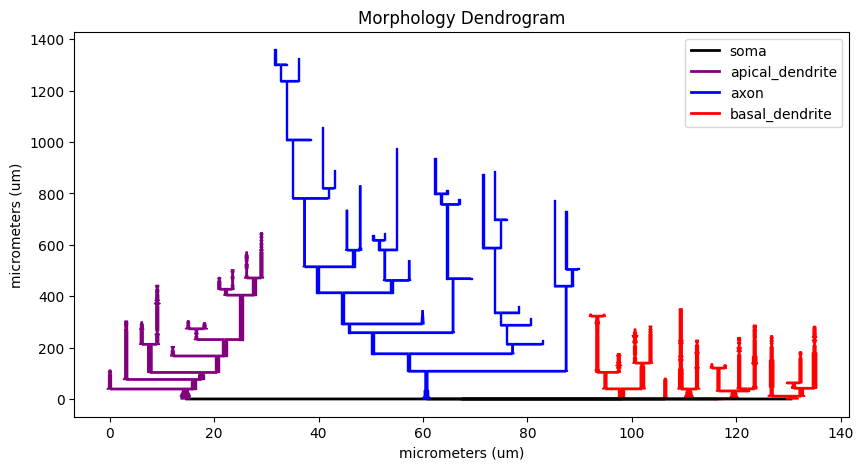

In [7]:
# dendrogram of one neuron
# Neuron 5
fig, ax = plt.subplots(figsize=(10, 5))
view.plot_dendrogram(neurons[5], ax=ax)


input/group_08/morph_2.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 46.74 55.59 -8.25 8.811 -1
2 1 46.740002 64.400002 (exp. 46.778999) -8.250000 8.811000 1
3 1 46.740002 46.779999 (exp. 64.401001) -8.250000 8.811000 1



[Neurite <type: 4>, Neurite <type: 2>, Neurite <type: 3>, Neurite <type: 3>, Neurite <type: 3>, Neurite <type: 3>]


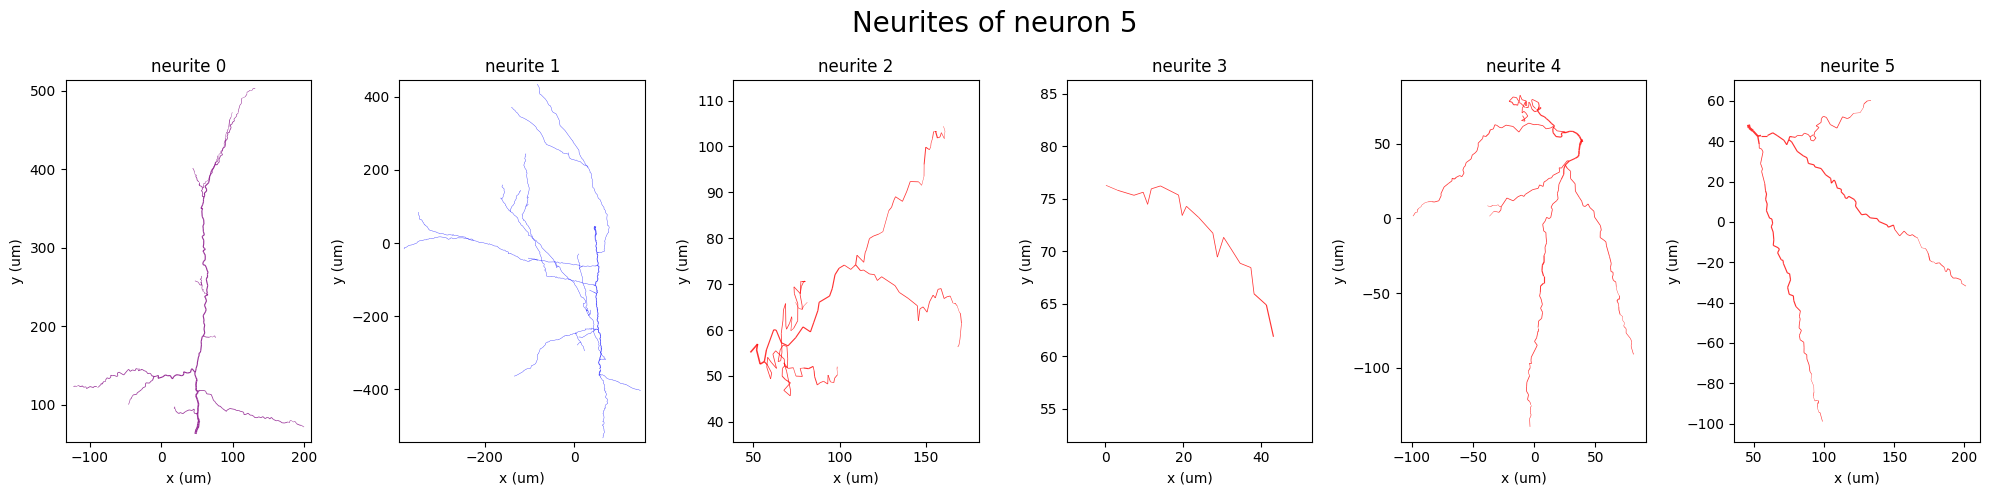

In [8]:
# plots of all neurites of a single neuron
# Neuron 5
neuron5 = neurons[5]
neurites = neuron5.neurites
L = len(neurites)
print(neurites)

# create L subplots, one for each neurite
fig, axes = plt.subplots(1, L, figsize=(20, 5)) 

for i, neurite in enumerate(neurites):
    current_axes = axes[i]

    view.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neurite {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle('Neurites of neuron 5', fontsize=20);
plt.tight_layout()

### **Grading**: 
<font color= 'red'>[0.5 pt]</font> for each of the 3 plots (all cells in group, dendrogram and individual neurites from one chosen cell)

# <font color= 'red'>Ex3:</font> Check your set of morphologies for mistakes

Now check your morphologies for mistakes. After the code has given you results, add you own reasoning and undertanding:
- Explain in your own words what each of the reported errors means and describe an approach that could be used to correct them.
- Try to understand if some errors could in fact not be errors but just due to different types of cells having different morphological features. Use the resources below to help you.
    <br>_example_: interneurons have dendrites that are not distinguished in apical vs basal, and in NeuroM they are labeled as having only basal_dendrites and no apical_dendrites. This does not mean their morphology is wrong.
- Once you have a good idea, group the morphologies into probably correct and definetely incorrect ones.

_Doc:_ if you need help with the meaning of certain errors, consult the [link](https://github.com/BlueBrain/NeuroM/blob/v1.4.17/neurom/check/neuron_checks.py) given in tutorial 2.
<br>_Resources:_ to understand the morphology of the two main classes of cells you can read the [Petilla group paper (2008)](https://www.nature.com/articles/nrn2402.pdf) for interneurons and the structure section of [this Scholarpedia page](http://www.scholarpedia.org/article/Pyramidal_neuron#Structure) for pyramidal neurons.

<font color= 'red'>[2 pts]</font>

In [9]:
from neurom.check.runner import CheckRunner

In [10]:
# your config and check run

config = {
    "checks": {
        "morphology_checks": [
            "has_axon",
            "has_basal_dendrite",
            "has_apical_dendrite",
            "has_no_jumps",
            "has_no_fat_ends",
            "has_nonzero_soma_radius",
            "has_all_nonzero_neurite_radii",
            "has_all_nonzero_section_lengths",
            "has_all_nonzero_segment_lengths",
            "has_no_flat_neurites",
            "has_nonzero_soma_radius",
            "has_no_narrow_start",
            "has_no_dangling_branch",
        ]
    },
    "options": {
        "has_nonzero_soma_radius": 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    },
}
check_runner = CheckRunner(config)
results = check_runner.run(morph_dir)
results

                Has apical dendrite FAIL
                                ALL FAIL
                       Has no jumps FAIL
                                ALL FAIL
                Has apical dendrite FAIL
                                ALL FAIL

input/group_08/morph_2.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 46.74 55.59 -8.25 8.811 -1
2 1 46.740002 64.400002 (exp. 46.778999) -8.250000 8.811000 1
3 1 46.740002 46.779999 (exp. 64.401001) -8.250000 8.811000 1

                       Has no jumps FAIL
             Has no dangling branch FAIL
                                ALL FAIL

input/group_08/morph_9.swc:0:warning
The only valid neuro-morpho soma is:
1 1 x   y   z r -1
2 1 x (y-r) z r  1
3 1 x (y+r) z r  1

Got:
1 1 15.24 -48.6 0 15.7567 -1
2 1 15.240000 -32.840000 (exp. -64.356697) 0.000000 15.756700 1
3 1 15.240000 -64.360001 (exp. -32.843300) 0.000000 15.756700 1

                       Has no jumps FAIL


{'files': {'input/group_08/morph_1.swc': OrderedDict([('Has axon', True),
               ('Has basal dendrite', True),
               ('Has apical dendrite', False),
               ('Has no jumps', True),
               ('Has no fat ends', True),
               ('Has nonzero soma radius', True),
               ('Has all nonzero neurite radii', True),
               ('Has all nonzero section lengths', True),
               ('Has all nonzero segment lengths', True),
               ('Has no flat neurites', True),
               ('Has no narrow start', True),
               ('Has no dangling branch', True),
               ('ALL', False)]),
  'input/group_08/morph_7.swc': OrderedDict([('Has axon', True),
               ('Has basal dendrite', True),
               ('Has apical dendrite', True),
               ('Has no jumps', False),
               ('Has no fat ends', True),
               ('Has nonzero soma radius', True),
               ('Has all nonzero neurite radii', True),
            

In [11]:
# your reasoning on each of the errors and possible corrections

## Morphologies with errors:
* morph_1.swc: Has no apical dendrite
* morph_2.swc: Has jumps and dangling branch
* morph_3.swc: Has no apical dendrite
* morph_5.swc: Has no apical dendrite and has jumps and a narrow start
* morph_7.swc: Has jumps
* morph_8.swc: Has no apical dendrite, and has jumps, a narrow start and dangling branch
* morph_9.swc: Has jumps, fat ends, narrow start and dangling branch


### Errors:
Mosphology has
- no apical dendrite:
> As mentioned in the exercice description, some of the interneurons have no dendrite destinction and are registered as not having apical dendrite on NeuroM. Therefore, it doesn't necessary mean there is an error
- jumps: 
> Jumps might be the results of precision of focus during microscopy imaging, which can be corrected manually based on morphological type of the cell and surrounding slices.
- fat ends:
>  A fat end is experiences when the end of the segment is larger than the mean of the rest by a factor of multiple_of_mean. This can be corrected by using other ends of the neurons within the same morphological class.
- narrow start:
> Indicates a narrower initial section of a neuron compared to the following section. This error can be corrected by examining the corresponding segments of the neurons with same morphological type.
- dangling branch:
> When a branch gets disconnected from the neuron, this can be solved automatically by connecting the branch to the nearest point on the neuron

Seeing that aèical dendrite alone doesn't necessarly mean there is an error, we will keep the morpholies that only have this "error". It concernes morph_1.swc and morph_3.swc.

This is gives us our final list for the part 4 of the exercice.

In [12]:
# your lists of probably correct and definetely wrong morphologies with explanation

probably_correct_morphologies      = [0, 1, 3, 4, 6]
definetely_incorrect_morphologies  = [2, 5, 7, 8, 9]

# explanation

### **Grading**:
-  <font color= 'red'>[1 pt]</font> for error explanation (0.5 for error meaning and 0.5 for possible solutions)
-  <font color= 'red'>[1 pt]</font> for testing the morphologies and listing probably good/definetely bad with explanation

# <font color= 'red'>Ex4:</font> Morphometrics

<font size = "3"> Now that you have added your reasoning to the automatic check run results, you have a group of morphologies that are probably correct and a suspicion on what general cell class they could belong to.
    
<font size = "3"> In this exercise you will analyse some of their characteristics using the morphometrics you learnt in tutorial 3 and see if you can separate them into the groups you suspect they may belong to.


- Take your probably correct cells, disregard the definetely incorrect ones.
- First compute three morphometric characteristics of all your cells, display the results using bar plots and compare what you see between the cells.
- Thinking about your hypothesis, see if you can choose 1 or 2 morphometric features that allow you to segregate your cells into two cell classes.
- Divide your cells accordingly into two groups and write the list down.

    
_Doc:_ the list of morphometric features available can be found in neurom.features.morphology
    
 <font color= 'red'> [2 pts]

In [13]:
# your three morphometrics bar plots

In [14]:
# your selection of the 1 or 2 best morphometrics to separate the cells into two general classes

In [15]:
# your list of cells divided accordingly

cell_class_one = { 'class_name':'class_1', 'cell_list':[0,2,4]}
cell_call_two = { 'class_name':'class_2', 'cell_list':[1,3]}

# some comment/explanation

### **Grading**: 
- <font color= 'red'>[0.5 pt]</font> for measurement and visualization
- <font color= 'red'>[1 pt]</font> for choice and explanation of which morphometrics were most helpful for the decision: what does the histogram indicate, how did this help identify the type of neuron?
- <font color= 'red'>[0.5 pt]</font> for correct classification of neurons